### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

### Training the classifier

In [2]:
train_datagen = ImageDataGenerator(rescale=1/.255,horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/.255)
test_datagen = ImageDataGenerator(rescale=1/.255)

train_generator = train_datagen.flow_from_directory("C:/Users/Lnovo/OneDrive/Desktop/Projects/Vegetable Images/train",
                                                    target_size=(224,224),batch_size=10,class_mode='categorical')

validation_generator= valid_datagen.flow_from_directory("C:/Users/Lnovo/OneDrive/Desktop/Projects/Vegetable Images/validation",
                                                 target_size=(224,224),batch_size=10,class_mode="categorical")

test_generator = test_datagen.flow_from_directory("C:/Users/Lnovo/OneDrive/Desktop/Projects/Vegetable Images/test",
                                                 target_size=(224,224),class_mode="categorical",shuffle=False)


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


#### Defining Convolutional Neural Network

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(132,(3,3),activation="ReLU",input_shape=(224,224,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='ReLU'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation='ReLU'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation="ReLU"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(256,activation="ReLU"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(256,activation="ReLU"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(128,activation="ReLU"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(64,activation="ReLU"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(32,activation="ReLU"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(15,activation="softmax"),
            
                             ])

In [5]:
model.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5,restore_best_weights=True)
history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 800, epochs = 50, callbacks = callback)

Epoch 1/50
800/800 [==============================] - 89s 109ms/step - loss: 1.7207 - accuracy: 0.4363 - val_loss: 5.8594 - val_accuracy: 0.3373
Epoch 2/50
800/800 [==============================] - 78s 98ms/step - loss: 1.4330 - accuracy: 0.5362 - val_loss: 11.9960 - val_accuracy: 0.4250
Epoch 3/50
800/800 [==============================] - 78s 97ms/step - loss: 1.2121 - accuracy: 0.6104 - val_loss: 1.7660 - val_accuracy: 0.5257
Epoch 4/50
800/800 [==============================] - 78s 97ms/step - loss: 1.0594 - accuracy: 0.6641 - val_loss: 76.5230 - val_accuracy: 0.4290
Epoch 5/50
800/800 [==============================] - 78s 97ms/step - loss: 0.9421 - accuracy: 0.7045 - val_loss: 37.2501 - val_accuracy: 0.7560
Epoch 6/50
800/800 [==============================] - 79s 98ms/step - loss: 0.8317 - accuracy: 0.7387 - val_loss: 15.5181 - val_accuracy: 0.7780
Epoch 7/50
800/800 [==============================] - 78s 97ms/step - loss: 0.7458 - accuracy: 0.7686 - val_loss: 1.5839 - val_accu

#### Plot the chart for accuracy and loss on both training and validation

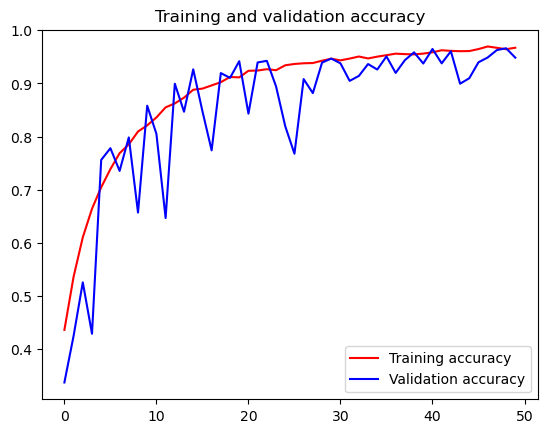

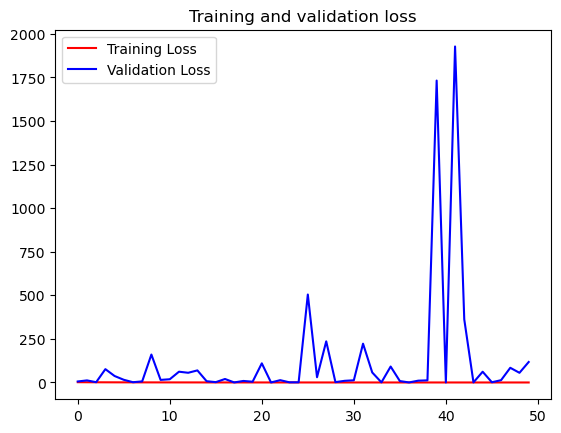

In [6]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
model.save('vegetables.h5')

### Loading the model weights

In [9]:
model = keras.models.load_model('vegetables.h5')

In [10]:
test_datagen = ImageDataGenerator(rescale=1/.255)
test_generator = test_datagen.flow_from_directory("C:/Users/Lnovo/OneDrive/Desktop/Projects/Vegetable Images/test/",
                                                 target_size=(224,224),batch_size=1,class_mode="categorical",shuffle=False)


Found 3000 images belonging to 15 classes.


In [11]:
test_ds = tf.keras.utils.image_dataset_from_directory('C:/Users/Lnovo/OneDrive/Desktop/Projects/Vegetable Images/test/',)
vege_names = test_ds.class_names

Found 3000 files belonging to 15 classes.


### Predictions on the test set

In [12]:
classes = model.predict(test_generator)
y= classes.argmax(axis=-1)
y_true = test_generator.classes

3000/3000 [==============================] - 16s 5ms/step


In [13]:
print(sklearn.metrics.classification_report(y_true,y))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       200
           1       0.94      0.99      0.97       200
           2       0.97      0.99      0.98       200
           3       0.93      0.88      0.90       200
           4       0.93      0.93      0.93       200
           5       0.95      0.93      0.94       200
           6       0.98      0.96      0.97       200
           7       0.97      0.96      0.97       200
           8       0.97      0.92      0.94       200
           9       0.86      0.95      0.91       200
          10       0.98      0.93      0.96       200
          11       0.97      0.98      0.98       200
          12       0.96      0.96      0.96       200
          13       0.96      0.99      0.98       200
          14       1.00      0.84      0.91       200

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95   

In [14]:

print(f"confusion matrix \n{sklearn.metrics.confusion_matrix(y_true, y)}")

confusion matrix 
[[195   1   0   0   1   0   2   0   0   1   0   0   0   0   0]
 [  0 199   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0 198   0   0   0   1   0   0   0   1   0   0   0   0]
 [  8   0   1 176   0   0   0   0   0  13   0   1   1   0   0]
 [  2   0   0   1 185   2   0   0   1   6   0   0   1   2   0]
 [  5   1   0   1   2 185   0   0   2   2   0   0   2   0   0]
 [  2   0   0   0   0   0 192   0   0   2   0   4   0   0   0]
 [  0   0   0   0   6   0   0 193   0   0   0   0   0   1   0]
 [  5   3   0   0   0   1   0   0 184   2   1   0   3   1   0]
 [  1   2   0   4   2   0   0   0   0 191   0   0   0   0   0]
 [  1   0   6   7   0   0   0   0   0   0 186   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   1   0 197   0   1   0]
 [  0   0   0   0   2   3   0   0   1   0   0   0 193   1   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0 199   0]
 [  8   5   0   1   0   4   0   6   1   2   1   1   1   2 168]]


In [15]:
print(f"Overall Accuracy of the classifier is {sklearn.metrics.accuracy_score(y_true, y)*100}%")


Overall Accuracy of the classifier is 94.69999999999999%
